### Importing important modules and libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
plt.style.use('seaborn')

### Checking if there is a saved log

In [2]:
oldlog=True # checking if there are any previous logs
while oldlog:
    try:
        saved_log=pd.read_json('logs.json')
    except ValueError:
        oldlog=False
        saved_log=pd.DataFrame({'Date':[],'Food': [] , 'Calories Consumed': []})
    else:
        break
saved_log['Date'] = saved_log['Date'] .dt.strftime('%Y-%m-%d')
saved_log

,Date,Food,Calories Consumed
0,1970-01-01,"Egg, whole, raw, fresh",166.0
1,2020-12-02,"Tangerine juice, canned, sweetened",250.0
2,2020-12-02,"Cheese, provolone",100.0
3,2020-12-02,"Pasta with meatballs in tomato sauce, canned e...",260.0
4,2020-12-02,"Orange juice, canned, unsweetened",105.0
5,2020-12-02,"Turkey, all classes, neck, meat only, cooked, ...",1370.0
6,2020-11-30,"Cheese, mozzarella, whole milk",340.0
7,2020-11-29,"Grapes, red or green (European type, such as T...",220.0
8,2020-11-28,"Applesauce, canned, unsweetened, without added...",31.5
9,2020-11-20,"Cake, yellow, commercially prepared, with vani...",4780.0


#### Reading the 'Calories.csv' file to get food nutrition data. And saving it into a pandas dataframe

In [3]:
df=pd.read_csv("Calories.csv")

In [4]:
calorie_log=[]            #calories list to be used to store logged data
food_log=[]              #food list
log_date=[]             #logdate list
savedgoal=[]

## All Functions
1. **foodsearch** : takes keyword and looks for food in the nutrition dataset
2. **calorie_calculator**: takes the food found from search and looks for the nutrition data, askes user amount and returns calories.
3. **askdate**: asks date 
4. **log_data**: logs data obtained from the above three functions and logs it into into a new dataframe.
5. **setgoal**: asks user to set daily calorie intake goal
6. **viewreport**: shows plot of intake trend and goal.


In [5]:
def foodsearch(food):                    #this function searches for a food in the calories table
    keyfound,related,found=[],[],[]
    for name in df['Description']:
        if food.title() in name:         #tries to find the keyword if it is main name of food
            keyfound.append(name)
    for name in df['Description']:
        if food.lower() in name:        #tries to find the keyword if it is found in any part of the food description
            related.append(name)
    if len(keyfound)>0:
        found=keyfound
    elif len(keyfound)==0 and len(related)>0:
        found=related
    if len(found)==0:                     #if the word is not found, tells user to try different keyword
        return 'Please try another keyword'
    else:
        possible_options={}
        possible_options = { (i+1) : found[i] for i in range(0, len(found) ) }  # puts the items found in a dictionary
        print("\nThe following matches were found")
        for key, value in possible_options.items():
            options=print(f" {key} : {value} ")
        while True: #checks if selection input is integer
            try:
                while True:              #checks if selection is in the dictionary
                    selection=int(input('\nPlease select the corresponding number to the best match: ')) #asks user to select best match 
                    if selection not in possible_options.keys()  :
                        print("Not an appropriate choice.")
                    else:
                        break
            except ValueError:                                            
                print("Please enter integer values only ")
            else:
                break
        
        foodfound=possible_options[selection]
        print(f"\n***Recorded***\nYou have selected {foodfound}.\n")
        return foodfound
    
def calorie_calculator(food):   #calculates calorie for the selected food based on serving size
    weight=df[df['Description']==food]['Weight (g)'].tolist()   #appending weight column from dataframe to list
    common_measure=df[df['Description']==food]['Common Measure'].tolist()  #converting dataframe column to list
    calorie=df[df['Description']==food]['Content per Measure'].tolist()    #converting dataframe column to list
    print(f"\nOne serving of {food.title()} has {common_measure[0]} or {weight[0]} grams.")
    prompt='Please enter the amount of serving you consumed. Choose one of the following \n a. 1/4 serving \n b. 1/2 serving\n c. 1 serving \n d. 1 & 1/2 servings\n e. 2 servings\n f. Enter custom serving size\n'
    while True:    #input validation
        serving_size=input(prompt)
        if serving_size not in ('a', 'b', 'c', 'd','e','f'):#options for serving size
            print("Please choose from a to f.")
        else:
            break
    if serving_size.lower()=='a':   
        calories=calorie[0]*0.25
    elif serving_size.lower()=='b':
        calories=calorie[0]*0.5
    elif serving_size.lower()=='c':
        calories=calorie[0]
    elif serving_size.lower()=='d':
        calories=calorie[0]*1.5
    elif serving_size.lower()=='e':
        calories=calorie[0]*2
    elif serving_size.lower()=='f':
        while True:
            try:
                calories=calorie[0]*float(input('Enter custom value in decimal: '))
            except ValueError: 
                print("Please enter the amount in decimals for example 0.5 instead of 1/2 ")
            else:
                break
    else: 
        calories=print('please choose from a to e')
   
    print(f"***Recorded***\nYou have succesfilly logged {calories} calories obtained from {food}!")
    return calories
def askdate():      # asks user date 
    today=input("Do you want to log today's intake or another day's intake?\nPlease respond with \n 'Yes' to log today's  or\n ' No' to log past intakes:\n ")
    if today.lower()=='yes':      #sets date to today's date 
        logdate = date.today()
    elif today.lower()=='no':         # asks user to enter date
        while True:
            try:
                date_entry = input('Enter a date in YYYY-MM-DD format')
                customdate =date.fromisoformat(date_entry)
            except ValueError or UnboundLocalError:
                print('***Invalid input***\nPlease try to enter the date in YYYY-MM-DD format')
            else:
                break
        logdate=customdate 
    else:
        print("***Invalid input***")
        askdate()   # makes the function restart
    return logdate

def log_data(logdate,calorie,food_to_log):
    calorie_log.append(calorie)
    food_log.append(food_to_log)
    log_date.append(logdate)
    d = {'Date': log_date,'Food': food_log, 'Calories Consumed': calorie_log}
    logfood = pd.DataFrame(data=d)
    return logfood
def setgoal():
    print('Please set a goal')
    print('Daily Recommended calorie intake by age and sex:\n Male, Age: 13-15, Average intake: 2,000-2600 calories\n Male, Age: 16-20, Average intake: 2,400-3200 calories\n Male, Age: 21-40, Average intake: 2,400-3000 calories\n Male, Age: 41-60, Average intake: 2,200-2800 calories\n Male, Age: 61 and up, Average intake: 2,000-2600 calories\n\n Female, Age: 13-18, Average intake: 1,800-2400 calories\n Female, Age: 19-30, Average intake: 2,000-2400 calories\n Female, Age: 31-60, Average intake: 1,800-2200 calories\n Female, Age: 61 and up, Average intake: 1,600-2000 calories')
    goal=int(input('Please enter your desired daily intake goal:'))
    return goal
def viewreport():
    newlog=True
    while newlog:
        try:
            updated_log
            log=updated_log.groupby('Date').sum()
        except NameError:
            newlog=False
            log=saved_log.groupby('Date').sum()
        else:
            break    
    log.plot( y='Calories Consumed',use_index=True, kind='bar', color='orange').axhline(y=goal)
    return plt
    

## Logging your diet:
#### Instructions
Run the following cell to initiate the program. Run it again to keep on adding food.

##### Issues with the program:
  1. It will not remember your logs if you restart the kernel( not exported to json).
  2. Setting the following in a function didn't work because one function takes the output of another as an input.
  3. User has to run the following cell to log multiple foods.
  4. There a are no quit options for inpur statements

In [6]:
print('*****WELCOME*****\n')
log_or_view=int(input('Please select one:\n 1. Start Logging \n 2. View Reports\n'))
if log_or_view==1:
    ldate=askdate()
    food_to_log=foodsearch(input("Please enter a keyword to start logging your meal: "))
    active= True
    while active:
        if food_to_log == 'Please try another keyword':
            active= False
            print('Please try another keyword')
            food_to_log=foodsearch(input("Please enter a keyword to start logging food: "))
        else:     
            break
    calorie=calorie_calculator(food_to_log)
    logged=log_data(ldate,calorie,food_to_log)
    updated_log=pd.concat([logged, saved_log], ignore_index=True) #merging old and new logs
    logged=updated_log
    print(logged)
elif log_or_view==2:
    while True:
        try:
            goal=savedgoal[0]
        except IndexError:
            False
            goalset=setgoal()
            savedgoal.append(goalset)
            goal=savedgoal[0]
        else:
            break
    viewreport()
    plt
    
    

*****WELCOME*****

Please select one:
 1. Start Logging 
 2. View Reports
1
Do you want to log today's intake or another day's intake?
Please respond with 
 'Yes' to log today's  or
 ' No' to log past intakes:
 No
Enter a date in YYYY-MM-DD format2020-12-01
Please enter a keyword to start logging your meal: Yogurt

The following matches were found
 1 : Yogurt, fruit, low fat, 10 grams protein per 8 ounce 
 2 : Yogurt, plain, low fat, 12 grams protein per 8 ounce 
 3 : Yogurt, plain, skim milk, 13 grams protein per 8 ounce 
 4 : Yogurt, plain, whole milk, 8 grams protein per 8 ounce 

Please select the corresponding number to the best match: 1

***Recorded***
You have selected Yogurt, fruit, low fat, 10 grams protein per 8 ounce.


One serving of Yogurt, Fruit, Low Fat, 10 Grams Protein Per 8 Ounce has 8-oz container or 227.0 grams.
Please enter the amount of serving you consumed. Choose one of the following 
 a. 1/4 serving 
 b. 1/2 serving
 c. 1 serving 
 d. 1 & 1/2 servings
 e. 2 ser

***Entry 2:*** Copy of the above cell to show the results if user wants to view report

*****WELCOME*****

Please select one:
 1. Start Logging 
 2. View Reports
2
Please set a goal
Daily Recommended calorie intake by age and sex:
 Male, Age: 13-15, Average intake: 2,000-2600 calories
 Male, Age: 16-20, Average intake: 2,400-3200 calories
 Male, Age: 21-40, Average intake: 2,400-3000 calories
 Male, Age: 41-60, Average intake: 2,200-2800 calories
 Male, Age: 61 and up, Average intake: 2,000-2600 calories

 Female, Age: 13-18, Average intake: 1,800-2400 calories
 Female, Age: 19-30, Average intake: 2,000-2400 calories
 Female, Age: 31-60, Average intake: 1,800-2200 calories
 Female, Age: 61 and up, Average intake: 1,600-2000 calories
Please enter your desired daily intake goal:2000


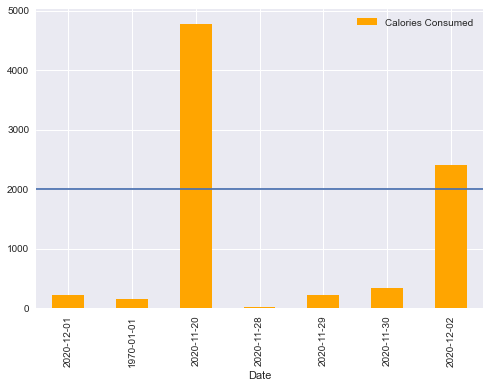

In [7]:
print('*****WELCOME*****\n')
log_or_view=int(input('Please select one:\n 1. Start Logging \n 2. View Reports\n'))
if log_or_view==1:
    ldate=askdate()
    food_to_log=foodsearch(input("Please enter a keyword to start logging your meal: "))
    active= True
    while active:
        if food_to_log == 'Please try another keyword':
            active= False
            print('Please try another keyword')
            food_to_log=foodsearch(input("Please enter a keyword to start logging food: "))
        else:     
            break
    calorie=calorie_calculator(food_to_log)
    logged=log_data(ldate,calorie,food_to_log)
    updated_log=pd.concat([logged, saved_log], ignore_index=True) #merging old and new logs
    logged=updated_log
    print(logged)
elif log_or_view==2:
    while True:
        try:
            goal=savedgoal[0]
        except IndexError:
            False
            goalset=setgoal()
            savedgoal.append(goalset)
            goal=savedgoal[0]
        else:
            break
    viewreport()
    plt
    

#####  Saving your log for next visit:
   Run the cell below to save today's log

In [8]:
logged.to_json('logs.json')     #saves log to json
 